<a href="https://colab.research.google.com/github/sara87821/machine_learning/blob/main/decision_tree(iris).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

iris=load_iris()

df=pd.DataFrame(iris['data'],
        columns=iris['feature_names'])
df["target"]=iris["target"]
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


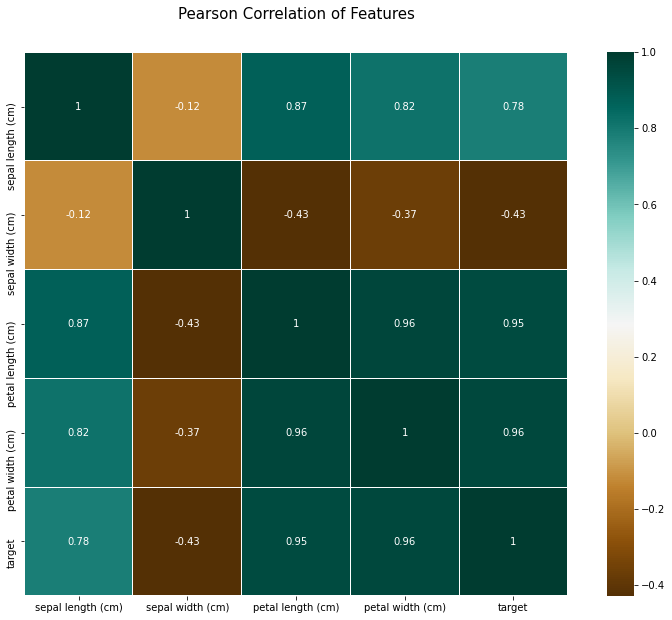

In [ ]:
plt.figure(figsize=(14,10))
plt.title('Pearson Correlation of Features',y=1.05,size=15)
sns.heatmap(df.astype(float).corr(),cmap="BrBG",linewidths=0.1,
            square=True,linecolor='white',annot=True)

In [ ]:
# sklearn前: pandas.DataFrame
# sklearn後: np.array
from sklearn.model_selection import train_test_split
data_train,data_test,target_train,target_test=train_test_split(
    iris['data'],
    iris['target'],
    test_size=0.1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=3)
clf = clf.fit(data_train,target_train)

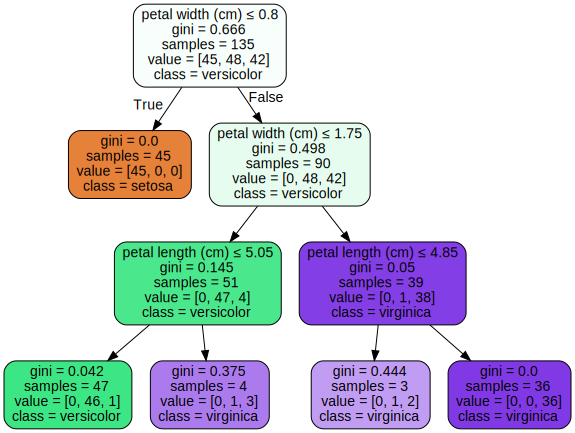

In [ ]:
from sklearn.tree import export_graphviz
import graphviz
dot_data=export_graphviz(clf,out_file=None,feature_names=iris.feature_names,
                         class_names=iris.target_names,
                         filled=True,rounded=True,
                         special_characters=True)
graph=graphviz.Source(dot_data)

graph 

In [ ]:
from sklearn.metrics import accuracy_score
predict=clf.predict(data_test)
accuracy_score(target_test,predict)

0.9333333333333333

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(target_test,predict)
pd.DataFrame(cm)

,0,1,2
0,5,0,0
1,0,2,0
2,0,1,7


In [ ]:
clf.feature_importances_

array([0.       , 0.       , 0.0532523, 0.9467477])